In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 输出高清图像
%config InlineBackend.figure_format='retina'
%matplotlib inline

# 忽略烦人的红色提示
import warnings
warnings.filterwarnings("ignore")
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV, cross_val_score,train_test_split,cross_validate, StratifiedKFold
from sklearn.metrics import roc_curve, auc, roc_auc_score,average_precision_score
from sklearn import model_selection

from sklearn.utils import shuffle 
import seaborn as sns


# 自定义颜色
import matplotlib
import matplotlib.colors as col
import matplotlib.cm as cm

# 从这里开始绘制箱线图表示误差的大小
from pandas.plotting import andrews_curves

# Basic

## 读取数据

In [155]:
from sklearn.utils  import shuffle 
from time import time
AAAAA = time()
df = pd.read_csv("SMOTE增强数据.csv")
X = df.iloc[:,1:]
Y = df["taste_num"]
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X = pd.DataFrame(X,columns = columns)
columns = X.columns
X


,BCUT2D_MWLOW,PEOE_VSA14,SMR_VSA1,MinEStateIndex,VSA_EState5,VSA_EState6,VSA_EState7,MolLogP
0,1.104810,0.542255,0.034388,-0.297392,-0.090308,-0.464041,-0.643900,-0.224383
1,-0.663646,-0.698675,-1.072708,0.797207,0.807252,-0.395705,0.573522,0.104653
2,-0.292522,-0.698675,0.034388,-0.097321,0.097546,0.613773,-0.548266,-0.271646
3,1.917508,0.542255,0.034388,-0.066215,-0.212319,-0.517870,-0.672820,-0.526634
4,-0.611132,0.542255,0.034388,-0.102919,-0.109023,-0.511185,-0.492849,0.268470
...,...,...,...,...,...,...,...,...
233,0.702275,0.542255,0.590138,-1.264276,-0.518744,-0.574046,-1.249663,-0.890629
234,0.296449,0.542255,1.141483,-1.447181,-0.591989,-0.699101,-0.526147,-0.848779
235,1.495630,0.542255,0.034388,-0.186221,-0.148982,-0.489927,-0.657807,-0.369733
236,1.122686,0.542255,0.570493,-0.688143,-0.747686,-0.734513,-0.745702,-0.849258


## 数据标准化

In [156]:
df_merge = pd.concat([Y,X],axis=1)
df_merge = shuffle(df_merge)
X = df_merge.iloc[:,1:]
Y = df_merge["taste_num"]
X

,BCUT2D_MWLOW,PEOE_VSA14,SMR_VSA1,MinEStateIndex,VSA_EState5,VSA_EState6,VSA_EState7,MolLogP
198,-0.666970,-0.698675,-0.536603,0.592917,0.456074,-0.435771,-0.027356,0.106381
232,0.691643,0.542255,0.034388,0.764521,0.144747,-0.424011,0.340848,0.084357
234,0.296449,0.542255,1.141483,-1.447181,-0.591989,-0.699101,-0.526147,-0.848779
191,-1.212278,0.542255,0.570493,-0.365039,-0.488367,-0.716855,-0.343022,0.679814
61,-0.054894,1.783186,2.213694,-1.607567,-2.198279,-0.875293,-1.719237,-1.312828
...,...,...,...,...,...,...,...,...
143,-1.595168,-0.698675,-1.072708,1.037128,1.022391,-0.359784,0.495046,1.485998
56,0.795866,-0.698675,-1.072708,0.852235,0.836578,-0.298841,1.358640,-0.376810
39,0.411522,3.024116,2.784685,-2.624375,-3.118157,-1.022999,-2.169030,-1.452990
119,-0.533821,-0.698675,-1.072708,0.986691,0.964139,-0.364114,-0.037750,0.690894


In [157]:
# # 得分计算函数
# def round_score(score):
#     return np.round(score, 3)

# def cv_score(X_train, y_train, random_state=0):
#     model = RandomForestClassifier(n_estimators=200,
#                                    max_depth=9,
#                                    random_state=random_state)
#     cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=random_state)

#     score_funcs = ['accuracy', 'precision', 'recall', 'roc_auc']

#     scores = cross_validate(model,
#                             X_train,
#                             y_train,
#                             scoring=score_funcs,
#                             cv=cv,   # 直接嫁接 上面定义的 cv
#                             return_estimator=True)
#     print('Mean Accuracy:', round_score(scores['test_accuracy'].mean()))  # 最外面的round就是一个取3位小数
#     print('Mean Precision:', round_score(scores['test_precision'].mean()))
#     print('Mean Recall:', round_score(scores['test_recall'].mean()))
#     print('Mean ROC AUC:', round_score(scores['test_roc_auc'].mean()))

#     return scores


# def predict_mean_score(scores, X_test):
#     pred_scores = []
#     print(scores)
# #     print(scores['estimator'])                  # scores['estimator']是列表
#     for i in range(len(scores['estimator'])):   # StratifiedKFold(n_splits=5）
#         model = scores['estimator'][i]
#         pred = model.predict_proba(X_test)      # 这一步得到针对每一个样预测的概率 分别是 正负样本的概率
#         pred_scores.append(pred)
#     pred_score = np.mean(pred_scores, axis=0)     # 它等于是把5个模型的预测结果取平均，反正加起来还是1

#     return pred_score


# # 函数和步骤的划分之处====================================

# X_train, X_test, y_train, y_test = train_test_split(
#     X,
#     Y,
#     test_size=0.2,      
#     random_state=0,
#     stratify=Y,
#     shuffle=True  # y_imbalance 是 label的那一列
# )
# scores = cv_score(X_train, y_train, random_state=0)     # 这个scores包含的信息非常大，可以间备注

# pred_score = predict_mean_score(scores, X_test)
# # print(pred_score)
# average_precision = average_precision_score(y_test, pred_score[:, 1])
# print('Average precision-recall score: {0:0.2f}'.format(average_precision))

包含的信息

{'fit_time': array([0.32611537, 0.31514192, 0.31915379, 0.32413554, 0.32115149]), 'score_time': array([0.03091717, 0.03193331, 0.03288579, 0.03191376, 0.0319047 ]), 'estimator': [RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0), RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0), RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0), RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0), RandomForestClassifier(max_depth=9, n_estimators=200, random_state=0)], 'test_accuracy': array([0.7972973 , 0.87837838, 0.78378378, 0.78378378, 0.83561644]), 'test_precision': array([0.86666667, 0.91176471, 0.8       , 0.81818182, 0.90322581]), 'test_recall': array([0.7027027 , 0.83783784, 0.75675676, 0.72972973, 0.75675676]), 'test_roc_auc': array([0.89992695, 0.94302411, 0.88823959, 0.86778671, 0.91216216])}
Average precision-recall score: 0.95

# AutoML  这一部分是关于分类算法的
分类原则是按照from sklearn.X 这里的X进行分类的

In [158]:
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=0)

# Linear_model

https://scikit-learn.org/stable/modules/classes.html#module-sklearn.linear_model
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html#sklearn.linear_model.Perceptron
https://scikit-learn.org/stable/modules/sgd.html#sgd

In [159]:
from sklearn.linear_model import RidgeClassifier,LogisticRegressionCV, Perceptron

## [LogisticRegressionCV](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html?highlight=logisticregression#sklearn.linear_model.LogisticRegression)_可用于师兄的论文
### LogisticRegressionCV_auto

In [160]:
# 因为变量有点多，所以还是决定做一个超参数搜索的
def LogisticRegressionCV_mdoel (X,Y):
    LogisticRegressionCV_auto = LogisticRegressionCV(random_state=0,n_jobs=-1)
    
    # 搜索的参数是para
    param_dict = {"solver":['newton-cg','lbfgs', 'liblinear', 'sag', 'saga'],
                  "penalty":['l1','l2', 'elasticnet',],
                  "class_weight":['none','balanced'],
                  "fit_intercept":[True,False],
                  "dual":[True,False],
                 }
    estimator = GridSearchCV(estimator = LogisticRegressionCV_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,LogisticRegressionCV_auto  = LogisticRegressionCV_mdoel(X,Y)
print(tmp_1,tmp_2,LogisticRegressionCV_auto)

{'class_weight': 'none', 'dual': True, 'fit_intercept': False, 'penalty': 'l2', 'solver': 'liblinear'} 0.8654255319148936 LogisticRegressionCV(class_weight='none', dual=True, fit_intercept=False,
                     n_jobs=-1, random_state=0, solver='liblinear')


## RidgeClassifier【非必要，逻辑回归l2正则化所取代】
### RidgeClassifier_auto

In [161]:
# def RidgeClassifier_model(X,Y):
#     """
#     输入：
#        X  Y:  输入的数据样本
#     输出：
#         得分矩阵df_score: 
#             列名：分数   | 行名：只有一行 index=0
#     """
    
#     # 首先实例化各个回归方法
#     RidgeClassifier_auto = RidgeClassifier(random_state=0)
#     param_dict = {"solver":['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
#     estimator = GridSearchCV(estimator = RidgeClassifier_auto, param_grid=param_dict, cv=5,n_jobs=-1,scoring = "accuracy")
#     estimator.fit(X,Y)
#     return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

# tmp_1,tmp_2,RidgeClassifier_auto = RidgeClassifier_model(X,Y)
# print(tmp_1,tmp_2,RidgeClassifier_auto)

## [Perceptron](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Perceptron.html?highlight=perceptron#sklearn.linear_model.Perceptron) _可用于师兄的论文
### Perceptron_auto

In [162]:
from sklearn.linear_model import Perceptron


def Perceptron_model(X, Y):  #这就是感知机

    # 首先实例化各个回归方法
    Perceptron_auto = Perceptron(random_state=0, n_jobs=-1)
    param_dict = {
        "penalty": ['l2', 'l1', 'elasticnet'],
        "class_weight": ['none', 'balanced'],
        "warm_start": [True, False],
        "early_stopping": [True, False],
        "fit_intercept": [True, False],
    }
    estimator = GridSearchCV(estimator=Perceptron_auto,
                             param_grid=param_dict,
                             cv=cv,
                             n_jobs=-1,
                             scoring="accuracy")
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


tmp_1, tmp_2, Perceptron_auto = Perceptron_model(X, Y)
print(tmp_1, tmp_2, Perceptron_auto)

{'class_weight': 'balanced', 'early_stopping': False, 'fit_intercept': False, 'penalty': 'l2', 'warm_start': True} 0.8448581560283689 Perceptron(class_weight='balanced', fit_intercept=False, n_jobs=-1,
           penalty='l2', warm_start=True)


## [Stochastic Gradient Descent](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html?highlight=sgdclassifier#sklearn.linear_model.SGDClassifier) _可用于师兄的论文
### SGDClassifier_auto

In [163]:
from sklearn.linear_model import SGDClassifier
def SGDClassifier_model(X,Y):

    # 首先实例化各个回归方法
    SGDClassifier_auto = SGDClassifier(random_state=0,n_jobs=-1)
    param_dict = {"penalty":['elasticnet','l2'],  #
                  "loss":[ 'modified_huber', 'log'], #'hinge'
                  "class_weight":['none','balanced'],
                  "average":[True,False],
                  "warm_start":[True,False],
                  "early_stopping":[True,False],
                  "fit_intercept":[True,False],
                 }
    estimator = GridSearchCV(estimator = SGDClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,SGDClassifier_auto = SGDClassifier_model(X,Y)
print(tmp_1,tmp_2,SGDClassifier_auto)

{'average': True, 'class_weight': 'balanced', 'early_stopping': True, 'fit_intercept': False, 'loss': 'modified_huber', 'penalty': 'l2', 'warm_start': True} 0.8697695035460994 SGDClassifier(average=True, class_weight='balanced', early_stopping=True,
              fit_intercept=False, loss='modified_huber', n_jobs=-1,
              random_state=0, warm_start=True)


# discriminant_analysis: 判别分析

## LinearDiscriminantAnalysis 线性判别分析
### LinearDiscriminantAnalysis_auto
具有线性决策边界的分类器，通过将类条件密度拟合到数据并使用贝叶斯规则生成。该模型将高斯密度拟合到每个类，假设所有类共享相同的协方差矩阵。

In [164]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


def LinearDiscriminantAnalysis_model(X, Y):

    # 首先实例化各个判别分析方法
    LinearDiscriminantAnalysis_auto = LinearDiscriminantAnalysis()
    param_dict = {
        "solver": ['svd', 'lsqr', 'eign'],
        "store_covariance": [True, False],
    }
    estimator = GridSearchCV(estimator=LinearDiscriminantAnalysis_auto,
                             param_grid=param_dict,
                             cv=cv,
                             n_jobs=-1,
                             scoring="roc_auc")
    estimator.fit(X, Y)
    return estimator.best_params_, estimator.best_score_, estimator.best_estimator_


tmp_1, tmp_2, LinearDiscriminantAnalysis_auto = LinearDiscriminantAnalysis_model(
    X, Y)
print(tmp_1, tmp_2, LinearDiscriminantAnalysis_auto)

{'solver': 'svd', 'store_covariance': True} 0.9316123188405797 LinearDiscriminantAnalysis(store_covariance=True)


## QuadraticDiscriminantAnalysis二次判别分析___等下去看看参数，
### QuadraticDiscriminantAnalysis_model

In [165]:
# from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
# def QuadraticDiscriminantAnalysis_model(X,Y):   
   
#     # 首先实例化各个判别分析方法
#     QuadraticDiscriminantAnalysis_auto = QuadraticDiscriminantAnalysis()
#     param_dict = { "store_covariance":[True,False],
#                  }
#     estimator = GridSearchCV(estimator = QuadraticDiscriminantAnalysis_auto, param_grid=param_dict, cv=5,n_jobs=-1,scoring = "roc_auc")
#     estimator.fit(X,Y)
#     return estimator.best_params_,estimator.best_score_, estimator.best_estimator_

# tmp_1,tmp_2,QuadraticDiscriminantAnalysis_auto = QuadraticDiscriminantAnalysis_model(X,Y)
# print(tmp_1,tmp_2,QuadraticDiscriminantAnalysis_auto)

# SVC Support Vector Machines

## LinearSVC_师兄可用
### LinearSVC_auto

In [166]:
from sklearn.svm import LinearSVC
def LinearSVC_model(X,Y):   #这就是感知机
    
    # 首先实例化各个回归方法
    LinearSVC_auto = LinearSVC(random_state=0)
    param_dict = {"penalty":['l2','l1'],
                 "loss":['hinge', 'squared_hinge'],
                 "dual":[True,False],
                 "fit_intercept":[True, False],
                 "class_weight":['none','balanced'],
                 }
    estimator = GridSearchCV(estimator = LinearSVC_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,LinearSVC_auto = LinearSVC_model(X,Y)
print(tmp_1,tmp_2,LinearSVC_auto)

{'class_weight': 'balanced', 'dual': True, 'fit_intercept': False, 'loss': 'squared_hinge', 'penalty': 'l2'} 0.8654255319148936 LinearSVC(class_weight='balanced', fit_intercept=False, random_state=0)


## svm.SVC _师兄可用
### SVC_auto

In [167]:
from sklearn.svm import SVC
def SVC_model(X,Y):   #这就是感知机
    
    # 首先实例化各个回归方法
    SVC_auto = SVC(random_state=0,probability=True)
    param_dict = {
                "gamma":['scale','auto'],
                "kernel":[ 'linear', 'poly','rbf', 'sigmoid'],      #, 'precomputed' 这个参数对于X有额外的要求
                "shrinking":[True, False],
                "class_weight":['none','balanced'],
                 }
    estimator = GridSearchCV(estimator = SVC_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,SVC_auto = SVC_model(X,Y)
print(tmp_1,tmp_2,SVC_auto)

{'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf', 'shrinking': True} 0.8781028368794328 SVC(class_weight='balanced', gamma='auto', probability=True, random_state=0)


## NuSVC _师兄可用
### NuSVC_auto

In [168]:
from sklearn.svm import NuSVC
def NuSVC_model(X,Y):   #这就是感知机
    # 首先实例化各个回归方法
    NuSVC_auto = NuSVC(random_state=0,probability=True)
    param_dict = {
                "gamma":['scale','auto'],
                "kernel":[ 'linear', 'poly','rbf', 'sigmoid'] ,     #, 'precomputed' 这个参数对于X有额外的要求
                "shrinking":[True, False],
                "class_weight":['none','balanced'],
                 }
    estimator = GridSearchCV(estimator = NuSVC_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,NuSVC_auto = NuSVC_model(X,Y)
print(tmp_1,tmp_2,NuSVC_auto)

{'class_weight': 'balanced', 'gamma': 'scale', 'kernel': 'poly', 'shrinking': True} 0.8696808510638296 NuSVC(class_weight='balanced', kernel='poly', probability=True, random_state=0)


# Tree

## DecisionTreeClassifier_师兄可用
### DecisionTreeClassifier_auto

In [169]:
from sklearn.tree import DecisionTreeClassifier
def DecisionTreeClassifier_model(X,Y): 

    
    # 首先实例化各个回归方法
    DecisionTreeClassifier_auto = DecisionTreeClassifier(random_state=0)
    param_dict = {"criterion":['gini', 'entropy'],
                 "splitter":['best', 'random'],
                 "max_features":['auto', 'sqrt', 'log2'],
                  "class_weight":['none','balanced'],
                 }
    estimator = GridSearchCV(estimator = DecisionTreeClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,DecisionTreeClassifier_auto = DecisionTreeClassifier_model(X,Y)
print(tmp_1,tmp_2,DecisionTreeClassifier_auto)


{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'} 0.8866134751773049 DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_features='auto', random_state=0, splitter='random')


## ExtraTreeClassifier
### ExtraTreeClassifier_auto

In [170]:
from sklearn.tree import ExtraTreeClassifier
def ExtraTreeClassifier_model(X,Y):

    
    # 首先实例化各个回归方法
    ExtraTreeClassifier_auto = ExtraTreeClassifier(random_state=0)
    param_dict = {"criterion":['gini', 'entropy'],
                  "splitter":['best', 'random'],
                  "max_features":['auto', 'sqrt', 'log2'],
                  "class_weight":['none','balanced'],
                 }
    estimator = GridSearchCV(estimator = ExtraTreeClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,ExtraTreeClassifier_auto = ExtraTreeClassifier_model(X,Y)
print(tmp_1,tmp_2,ExtraTreeClassifier_auto)

{'class_weight': 'balanced', 'criterion': 'entropy', 'max_features': 'auto', 'splitter': 'random'} 0.8866134751773049 ExtraTreeClassifier(class_weight='balanced', criterion='entropy',
                    random_state=0)


# 集成模型

## 	AdaBoost 分类器
### AdaBoostClassifier_auto
 base_estimator = DecisionTreeClassifier_auto_ada 可以选择之前设置好的，模型，可以试试
 adaboost有一个单独属性,estimator_errors_可以看到的每一个弱分冷垒起的学习情况

In [171]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

DecisionTreeClassifier_auto_ada = DecisionTreeClassifier(random_state=0,criterion= 'gini', max_features='auto', splitter='best')
def AdaBoostClassifier_model(X,Y):

    # 首先实例化各个回归方法
    AdaBoostClassifier_auto = AdaBoostClassifier(random_state=0)
    param_dict = {                                                       #"n_estimators":[10,30,50,70,90,110],
#                  "learning_rate":[0,0.5,1,1.5,2],
                 "algorithm":['SAMME', 'SAMME.R']}
    estimator = GridSearchCV(estimator = AdaBoostClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,AdaBoostClassifier_auto = AdaBoostClassifier_model(X,Y)
print(tmp_1,tmp_2,AdaBoostClassifier_auto)

{'algorithm': 'SAMME'} 0.878368794326241 AdaBoostClassifier(algorithm='SAMME', random_state=0)


## 	BaggingClassifier 分类器
### BaggingClassifier_auto

In [172]:
from sklearn.ensemble import BaggingClassifier
def BaggingClassifier_model(X,Y):
    
    # 首先实例化各个回归方法
    BaggingClassifier_auto = BaggingClassifier(random_state=0,n_jobs=-1)
    param_dict = {#"n_estimators":[10,30,50,70,90,110],
                 "bootstrap":["True","False"],
                 "bootstrap_features":["True","False"],
                 "oob_score":["True","False"],
    }
    estimator = GridSearchCV(estimator = BaggingClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,BaggingClassifier_auto = BaggingClassifier_model(X,Y)
print(tmp_1,tmp_2)

{'bootstrap': 'True', 'bootstrap_features': 'True', 'oob_score': 'True'} 0.911790780141844


## 	GradientBoostingClassifier 分类器
### GradientBoostingClassifier_auto

In [173]:
from sklearn.ensemble import GradientBoostingClassifier
def GradientBoostingClassifier_model(X,Y):
    
    # 首先实例化各个回归方法
    GradientBoostingClassifier_auto = GradientBoostingClassifier(random_state=0)
    param_dict = {"loss":["deviance","exponential"],
#                   "n_estimators":[10,30,50,70,90,110],
#                  "learning_rate":[0,0.5,1,1.5,2],
                 "criterion":['friedman_mse', 'mse',"mae"],
                 "max_features":["auto","sqrt","log2"]}
    estimator = GridSearchCV(estimator = GradientBoostingClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,GradientBoostingClassifier_auto = GradientBoostingClassifier_model(X,Y)
print(tmp_1,tmp_2,GradientBoostingClassifier_auto)

{'criterion': 'friedman_mse', 'loss': 'deviance', 'max_features': 'log2'} 0.9157801418439717 GradientBoostingClassifier(max_features='log2', random_state=0)


## 	RandomForestClassifier _师兄可以用
### RandomForestClassifier_auto

In [174]:
from sklearn.ensemble import RandomForestClassifier
def RandomForestClassifier_model(X,Y):

    # 首先实例化各个回归方法
    RandomForestClassifier_auto = RandomForestClassifier(random_state=0,n_jobs=-1)
    param_dict = {
#                   "n_estimators":[10,30,50,70,90,110],
                 "criterion":['gini', 'entropy'],
                 "max_features":["auto","sqrt","log2"],
                 "class_weight":['none','balanced',"balanced_subsample"],
                 "bootstrap":["True","False"],
                 "oob_score":["True","False"],
        
    }
    estimator = GridSearchCV(estimator = RandomForestClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,RandomForestClassifier_auto = RandomForestClassifier_model(X,Y)
print(tmp_1,tmp_2)


{'bootstrap': 'True', 'class_weight': 'balanced', 'criterion': 'gini', 'max_features': 'auto', 'oob_score': 'True'} 0.924290780141844


## XGBoost
### xgboost_auto
XGBoost有两大类接口：XGBoost原生接口和scikit-learn接口 ，并且XGBoost能够实现分类和回归两种任务
<br>
https://blog.csdn.net/MG_ApinG/article/details/87934052?ops_request_misc=%257B%2522request%255Fid%2522%253A%2522163020792416780274120555%2522%252C%2522scm%2522%253A%252220140713.130102334.pc%255Fall.%2522%257D&request_id=163020792416780274120555&biz_id=0&utm_medium=distribute.pc_search_result.none-task-blog-2~all~first_rank_ecpm_v1~rank_v29_ecpm-14-87934052.first_rank_v2_pc_rank_v29&utm_term=xgboost+python%E5%AE%9E%E7%8E%B0&spm=1018.2226.3001.4187

In [175]:
import xgboost as xgb
from xgboost import plot_importance

def xgboost_model(X,Y):
    """
    
    """
    xgboost_auto = xgb.XGBClassifier(random_state=0, n_jobs=1)
    param_dict = {"maximize":["True","False"],
#                   "n_estimators":[20,40,60,80,100,120],
                 "objective":['binary:logistic', 'binary:hinge'],               # reg:linear回归时使用
    }
    estimator = GridSearchCV(estimator = xgboost_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,xgboost_auto = xgboost_model(X,Y)
print(tmp_1,tmp_2,xgboost_auto)

[21:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "maximize" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:07] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
{'maximize': 'True', 'objective': 'binary:logistic'} 0.8947695035460994 XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learnin

In [176]:
# xgboost.train(params,      #这是一个字典，里面包含着训练中的参数关键字和对应的值，形式是params = {‘booster’:’gbtree’, ’eta’:0.1}
#               dtrain,      #训练的数据
#               num_boost_round=10,  #这是指提升迭代的个数
# #               形式是evals = [(dtrain,’train’), (dval,’val’)]或者是evals = [ (dtrain,’train’)], 
# #               对于第一种情况，它使得我们可以在训练过程中观察验证集的效果
#               evals=(),  
#               obj=None,                        # 自定义目的函数
#               feval=None,                      # 自定义评估函数
#               maximize=False,                  # 是否对评估函数进行最大化
#               early_stopping_rounds=None,        # 早期停止次数 ，假设为100，验证集的误差迭代到一定程度在100次内不能再继续降低
#               evals_result=None,                # 字典，存储在watchlist 中的元素的评估结果
#               verbose_eval=True,
#               learning_rates=None,             # 每一次提升的学习率的列表，
#               xgb_model=None) 

## 这里有一个集成学习的分类器，可以到时候看看，把其他所有误差不相关的给集成进来
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier

## 众数投票机制VotingClassifier
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingClassifier.html#sklearn.ensemble.VotingClassifier

# Nearest Neighbors

## KNeighborsClassifier
### KNeighborsClassifier_auto

In [177]:
from sklearn.neighbors import KNeighborsClassifier
def KNeighborsClassifier_model(X,Y):   
    
    # 首先实例化各个回归方法
    KNeighborsClassifier_auto = KNeighborsClassifier(n_jobs=1)
    param_dict = {"n_neighbors":[2,3,4,5,6,7,8,9,10,11,12,13],
                 "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
                  "weights":['uniform', 'distance'],
                  "p":[1, 2],
                 }
    estimator = GridSearchCV(estimator = KNeighborsClassifier_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,KNeighborsClassifier_auto = KNeighborsClassifier_model(X,Y)
print(tmp_1,tmp_2,KNeighborsClassifier_auto)

{'algorithm': 'auto', 'n_neighbors': 2, 'p': 2, 'weights': 'distance'} 0.8992021276595745 KNeighborsClassifier(n_jobs=1, n_neighbors=2, weights='distance')


## NearestNeighbors
### NearestNeighbors_auto

In [178]:
from sklearn.neighbors import NearestNeighbors
def NearestNeighbors_model(X,Y):   
    
    # 首先实例化各个回归方法
    NearestNeighbors_auto = NearestNeighbors(n_jobs=1)
    param_dict = {
#                 "radius":[0.5, 1, 1.5, 4],
                  "p":[1, 2],
                  "algorithm":['auto', 'ball_tree', 'kd_tree', 'brute'],
                 }
    estimator = GridSearchCV(estimator = NearestNeighbors_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,NearestNeighbors_auto = NearestNeighbors_model(X,Y)
print(tmp_1,tmp_2,NearestNeighbors_auto)

{'algorithm': 'auto', 'p': 1} nan NearestNeighbors(n_jobs=1, p=1)


# naive_bayes

## BernoulliNB 
先验伯努利验证的朴素贝叶斯
### BernoulliNB_auto

In [179]:
from sklearn.naive_bayes import BernoulliNB
def BernoulliNB_model(X,Y):   
    
    # 首先实例化各个回归方法
    BernoulliNB_auto = BernoulliNB()
    param_dict = {"fit_prior":["True","False"],
                  "alpha":[-1,0, 1,2],
                 }
    estimator = GridSearchCV(estimator = BernoulliNB_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,BernoulliNB_auto = BernoulliNB_model(X,Y)
print(tmp_1,tmp_2,BernoulliNB_auto)

{'alpha': 2, 'fit_prior': 'True'} 0.8655141843971631 BernoulliNB(alpha=2, fit_prior='True')


## GaussianNB————待查看参数
先验高斯朴素贝叶斯
### GaussianNB_auto

In [180]:
from sklearn.naive_bayes import GaussianNB
def GaussianNB_model(X,Y):   
    # 首先实例化各个回归方法
    GaussianNB_auto = GaussianNB()
    param_dict = {
                 }
    estimator = GridSearchCV(estimator = GaussianNB_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "accuracy")
    estimator.fit(X,Y)
    return estimator.best_params_,estimator.best_score_,estimator.best_estimator_

tmp_1,tmp_2,GaussianNB_auto = GaussianNB_model(X,Y)
print(tmp_1,tmp_2,GaussianNB_auto)

{} 0.8654255319148936 GaussianNB()


## ComplementNB,函数有一个局限，需要非负

In [181]:
# from sklearn.naive_bayes import ComplementNB
# def ComplementNB_model(X,Y):   
    
#     # 首先实例化各个回归方法
#     model_auto = ComplementNB()
#     param_dict = {"fit_prior":["True","False"],
#                   "alpha":[-1,0, 1,2],
#                   "norm":["True","False"]
#                  }
#     estimator = GridSearchCV(estimator = model_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "roc_auc")
#     estimator.fit(X,Y)
#     return estimator.best_params_,estimator.best_score_

# tmp_1,tmp_2 = ComplementNB_model(X,Y)
# print(tmp_1,tmp_2)


## MultinomialNB,函数有一个局限，需要非负

In [182]:
# from sklearn.naive_bayes import MultinomialNB
# def MultinomialNB_model(X,Y):   
    
#     # 首先实例化各个回归方法
#     model_auto = MultinomialNB()
#     param_dict = {"fit_prior":["True","False"],
#                   "alpha":[-1,0, 1,2],
#                  }
#     estimator = GridSearchCV(estimator = model_auto, param_grid=param_dict, cv=cv,n_jobs=-1,scoring = "roc_auc")
#     estimator.fit(X,Y)
#     return estimator.best_params_,estimator.best_score_

# tmp_1,tmp_2 = MultinomialNB_model(X,Y)
# print(tmp_1,tmp_2)


# 朴素贝叶斯网络 _Python机器学习与算法P334

# 集合展示图
之前的给我们参数，我们复制到下面就可以做到图里面了

## 绘制ROC图

### bug 汇总
RidgeClassifier_auto,    'RidgeClassifier' object has no attribute 'predict_proba'<br>
解释：根据[文档](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeClassifier.html#sklearn.linear_model.RidgeClassifier)， aRidge.Classifier没有predict_proba属性。这一定是因为对象在拟合过程中自动选取了一个阈值,并且在逻辑回归中被考虑到了，所以没关系<br>
Perceptron_auto,  'RidgeClassifier' object has no attribute 'predict_proba'，没有或者属性，那只能没有了<br>
LinearSVC_auto, # 'LinearSVC' object has no attribute 'predict_proba'   同上【属于只可以预测】<br>
NearestNeighbors_auto, # 'NearestNeighbors' object has no attribute 'predict'<br>

### 作图

[21:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "maximize" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:59:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:59:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "maximize" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used 

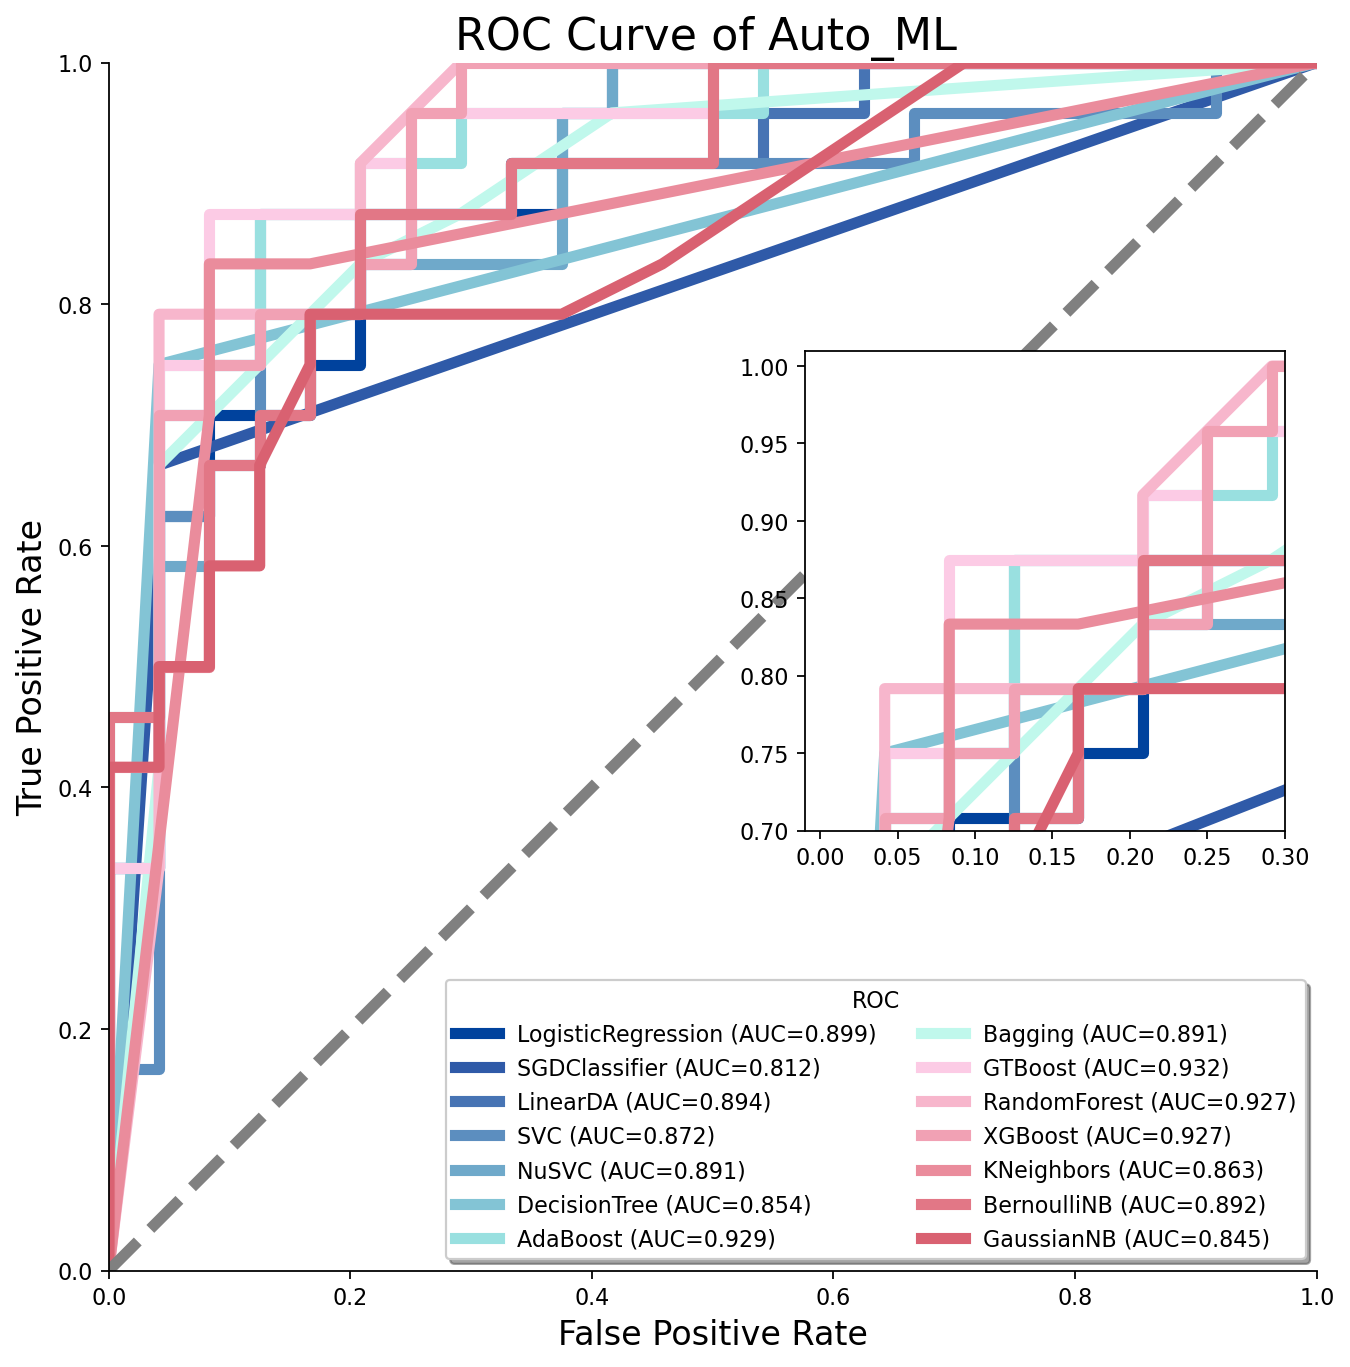

In [198]:
def auto_model_roc(X, Y):
    """
    说明：
    """
    #     16种颜色

    colors = [
        '#00429d', '#2f5aa8', '#4774b4', '#5c8ebf', '#6fa9ca', '#83c4d5',
        '#99e0e0', '#c0f8ec', '#fccbe5', '#f7b6cc', '#f1a1b4', '#ea8c9c',
        '#e27786', '#d96171', '#cf4969'
    ]

    #     创建model字典
    algorithm_models = [
        LogisticRegressionCV_auto,
        #         RidgeClassifier_auto,    'RidgeClassifier' object has no attribute 'predict_proba'
        #         Perceptron_auto,  'RidgeClassifier' object has no attribute 'predict_proba'
        SGDClassifier_auto,
        LinearDiscriminantAnalysis_auto,
#         QuadraticDiscriminantAnalysis_auto,
        #         LinearSVC_auto, # 'LinearSVC' object has no attribute 'predict_proba'
        SVC_auto,
        NuSVC_auto,
        DecisionTreeClassifier_auto,
        #         ExtraTreeClassifier_auto,
        AdaBoostClassifier_auto,
        BaggingClassifier_auto,
        GradientBoostingClassifier_auto,
        RandomForestClassifier_auto,
        xgboost_auto,
        KNeighborsClassifier_auto,
        #         NearestNeighbors_auto, # 'NearestNeighbors' object has no attribute 'predict'
        GaussianNB_auto,
        BernoulliNB_auto,
    ]

    #     创建名字列表
    algorithm_names = [
        "LogisticRegression",
        #         "RidgeClassifier",
        #         "Perceptron",
        "SGDClassifier",
        "LinearDA",
#         "QuadraticDA",
        #         "LinearSVC",
        "SVC",
        "NuSVC",
        "DecisionTree",
        #         "ExtraDecisionTree",
        "AdaBoost",
        "Bagging",
        "GTBoost",
        "RandomForest",
        "XGBoost",
        "KNeighbors",
        #         "NearestNeighbors"
        "BernoulliNB",
        "GaussianNB"
    ]

    # 这里是画出出 当前数据集划分下的AUC曲线
    X_train_, X_test_, y_train, y_test = model_selection.train_test_split(
        X, Y,
        test_size=0.2,
        random_state=0,
        stratify=Y,
        shuffle=True  # y_imbalance 是 label的那一列
    )
    
    transfer = StandardScaler()
    X_train_0 = transfer.fit_transform(X_train_)
    X_test_0 = transfer.transform(X_test_)

    fig = plt.figure(figsize=(10, 10), dpi=80)
    for (name, method, colorname) in zip(algorithm_names, algorithm_models,
                                         colors):
#         print(name)
        method.fit(X_train_0, y_train)
        y_test_preds = method.predict(X_test_0)
        y_test_predprob = method.predict_proba(X_test_0)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)

        plt.plot(fpr,
                 tpr,
                 lw=5,
                 label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),
                 color=colorname)

    plt.plot([0, 1], [0, 1], '--', lw=5, color='grey')
    plt.axis('square')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.xlabel('False Positive Rate', fontsize=15)
    plt.ylabel('True Positive Rate', fontsize=15)
    plt.title('ROC Curve of Auto_ML ', fontsize=20)
    ax = plt.gca()
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.legend(loc='lower right',
               fontsize=10,
               title="ROC",
               shadow=True,
               fancybox=True,
               ncol=2)

    ## 添加局部放大图
    inset_ax = fig.add_axes([0.57, 0.40, 0.3, 0.3],
                            facecolor="white")  # 这是局部放大图四个角的位置
    for (name, method, colorname) in zip(algorithm_names, algorithm_models,
                                         colors):
        method.fit(X_train_0, y_train)
        y_test_preds = method.predict(X_test_0)
        y_test_predprob = method.predict_proba(X_test_0)[:, 1]
        fpr, tpr, thresholds = roc_curve(y_test, y_test_predprob, pos_label=1)
        inset_ax.plot(fpr,
                      tpr,
                      lw=5,
                      label='{} (AUC={:.3f})'.format(name, auc(fpr, tpr)),
                      color=colorname)
        inset_ax.set_xlim([-0.01, 0.3])
        inset_ax.set_ylim([0.7, 1.01])
        inset_ax.grid()
    plt.savefig("Paper_Fig\\Mdeol_Selection\\ROC图.svg",bbox_inches="tight")
    plt.show()


auto_model_roc(X, Y)

## 小提琴图：一般是ROC，一半是准确率

In [184]:
# # 数据处理_标准化
# X = StandardScaler().fit_transform(X)
# X = pd.DataFrame(X,columns = columns)

In [185]:
def auto_model(X,Y,cv):
    """
    说明
    
    """
    # 实例化ML机器，具体的参数，其实是和上面搜索得一样得，
    colors = [
        '#00429d', '#2f5aa8', '#4774b4', '#5c8ebf', '#6fa9ca', '#83c4d5',
        '#99e0e0', '#c0f8ec', '#fccbe5', '#f7b6cc', '#f1a1b4', '#ea8c9c',
        '#e27786', '#d96171', '#cf4969'
    ]

    #     创建model字典
    algorithm_models = [
        LogisticRegressionCV_auto,
        #         RidgeClassifier_auto,    'RidgeClassifier' object has no attribute 'predict_proba'
        #         Perceptron_auto,  'RidgeClassifier' object has no attribute 'predict_proba'
        SGDClassifier_auto,
        LinearDiscriminantAnalysis_auto,
#         QuadraticDiscriminantAnalysis_auto,
        #         LinearSVC_auto, # 'LinearSVC' object has no attribute 'predict_proba'
        SVC_auto,
        NuSVC_auto,
        DecisionTreeClassifier_auto,
        #         ExtraTreeClassifier_auto,
        AdaBoostClassifier_auto,
        BaggingClassifier_auto,
        GradientBoostingClassifier_auto,
        RandomForestClassifier_auto,
        xgboost_auto,
        KNeighborsClassifier_auto,
        #         NearestNeighbors_auto, # 'NearestNeighbors' object has no attribute 'predict'
        GaussianNB_auto,
        BernoulliNB_auto,
    ]

    #     创建名字列表
    algorithm_names = [
        "LogisticRegression",
        #         "RidgeClassifier",
        #         "Perceptron",
        "SGDClassifier",
        "LinearDA",
#         "QuadraticDA",
#                 "LinearSVC",
        "SVC",
        "NuSVC",
        "DecisionTree",
        #         "ExtraDecisionTree",
        "AdaBoost",
        "Bagging",
        "GTBoost",
        "RandomForest",
        "XGBoost",
        "KNeighbors",
        #         "NearestNeighbors"
        "BernoulliNB",
        "GaussianNB"
    ]

    # 指定存储结果的字典表 行是模型名字，列是次数
    tmp_1 = np.zeros((len(algorithm_names),5))
    Auc_data = pd.DataFrame(tmp_1,index=algorithm_names,columns=range(5))
    tmp_2 = np.zeros((len(algorithm_names),5))
    Acc_data = pd.DataFrame(tmp_2,index=algorithm_names,columns=range(5))
    tmp_3 = np.zeros((len(algorithm_names),5))
    Recall_data = pd.DataFrame(tmp_3,index=algorithm_names,columns=range(5))  
    tmp_4 = np.zeros((len(algorithm_names),5))
    Precision_data = pd.DataFrame(tmp_4,index=algorithm_names,columns=range(5)) 
    
    score_funcs = ['accuracy', 'precision', 'recall', 'roc_auc'] 
    
    for (name,method) in zip(algorithm_names,algorithm_models):
#         print(name)
        scores = cross_validate(method,
                            X,
                            Y,
                            scoring=score_funcs,
                            cv=cv,             # 直接嫁接 上面定义的 cv
                            return_estimator=True)
    
        model_auc =  scores['test_accuracy']
        model_acc = scores['test_roc_auc']
        model_recall =  scores['test_recall']
        model_precision = scores['test_precision']
        
        for i in range(5):
            Auc_data[i].loc[name]  = model_auc[i]
            Acc_data[i].loc[name]  = model_acc[i]
            Recall_data[i].loc[name] = model_recall[i]
            Precision_data[i].loc[name] = model_precision[i]
  
    return Auc_data,Acc_data,Recall_data,Precision_data

A,B,C,D = auto_model(X,Y,cv)

[21:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "maximize" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[21:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
[21:54:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.4.0/src/learner.cc:573: 
Parameters: { "maximize" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used 

In [186]:
A

,0,1,2,3,4
LogisticRegression,0.854167,0.875000,0.895833,0.872340,0.829787
SGDClassifier,0.854167,0.875000,0.875000,0.893617,0.851064
LinearDA,0.854167,0.833333,0.812500,0.829787,0.829787
SVC,0.895833,0.854167,0.895833,0.893617,0.851064
NuSVC,0.875000,0.833333,0.916667,0.893617,0.829787
DecisionTree,0.854167,0.916667,0.875000,0.936170,0.851064
AdaBoost,0.833333,0.833333,0.916667,0.914894,0.893617
Bagging,0.916667,0.875000,0.937500,0.936170,0.893617
GTBoost,0.937500,0.895833,0.958333,0.936170,0.851064
RandomForest,0.937500,0.916667,0.937500,0.936170,0.893617


In [187]:
colors = [
    '#00429d', '#2f5aa8', '#4774b4', '#5c8ebf', '#6fa9ca', '#83c4d5',
    '#99e0e0', '#c0f8ec', '#fccbe5', '#f7b6cc', '#f1a1b4', '#ea8c9c',
    '#e27786', '#d96171', '#cf4969'
]

# 处理A数据
aa = A.T
aa.describe()

,LogisticRegression,SGDClassifier,LinearDA,SVC,NuSVC,DecisionTree,AdaBoost,Bagging,GTBoost,RandomForest,XGBoost,KNeighbors,BernoulliNB,GaussianNB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.865426,0.869770,0.831915,0.878103,0.869681,0.886613,0.878369,0.911791,0.915780,0.924291,0.894770,0.899202,0.865426,0.865514
std,0.024804,0.017441,0.014859,0.023310,0.037820,0.038113,0.042100,0.027216,0.042674,0.019294,0.040174,0.037398,0.019956,0.011876
min,0.829787,0.851064,0.812500,0.851064,0.829787,0.851064,0.833333,0.875000,0.851064,0.893617,0.829787,0.854167,0.829787,0.851064
25%,0.854167,0.854167,0.829787,0.854167,0.833333,0.854167,0.833333,0.893617,0.895833,0.916667,0.895833,0.872340,0.872340,0.854167
50%,0.872340,0.875000,0.829787,0.893617,0.875000,0.875000,0.893617,0.916667,0.936170,0.936170,0.895833,0.895833,0.875000,0.872340
75%,0.875000,0.875000,0.833333,0.895833,0.893617,0.916667,0.914894,0.936170,0.937500,0.937500,0.914894,0.936170,0.875000,0.875000
max,0.895833,0.893617,0.854167,0.895833,0.916667,0.936170,0.916667,0.937500,0.958333,0.937500,0.937500,0.937500,0.875000,0.875000


In [188]:
# 处理B数据
bb = B.T
bb.describe()

,LogisticRegression,SGDClassifier,LinearDA,SVC,NuSVC,DecisionTree,AdaBoost,Bagging,GTBoost,RandomForest,XGBoost,KNeighbors,BernoulliNB,GaussianNB
count,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000
mean,0.936609,0.940836,0.931612,0.944037,0.942029,0.886775,0.951540,0.955729,0.954046,0.960243,0.940595,0.928872,0.928774,0.921649
std,0.013853,0.013528,0.013626,0.014902,0.015412,0.038162,0.020823,0.027121,0.027930,0.024504,0.035641,0.013021,0.014666,0.024999
min,0.914931,0.918403,0.916667,0.923913,0.925347,0.851449,0.927083,0.931159,0.929348,0.933160,0.905797,0.915799,0.909722,0.881076
25%,0.930556,0.940972,0.923913,0.935764,0.925725,0.854167,0.934783,0.934896,0.931159,0.944746,0.918403,0.919271,0.920139,0.918403
50%,0.944444,0.944444,0.930556,0.943841,0.949653,0.875000,0.958333,0.943841,0.942708,0.951087,0.923913,0.927536,0.927536,0.924819
75%,0.945652,0.945652,0.934028,0.956597,0.951087,0.916667,0.958333,0.976562,0.975694,0.984375,0.963542,0.932971,0.942029,0.940104
max,0.947464,0.954710,0.952899,0.960069,0.958333,0.936594,0.979167,0.992188,0.991319,0.987847,0.991319,0.948785,0.944444,0.943841


In [189]:
AA = aa.melt()
AA.columns = ["Model_A","ROC"]
df_A = AA

BB = bb.melt()
BB.columns = ["Model_B","ACC"]
df_B = BB

In [190]:
# 处理合并数据
df_AB =  pd.concat([df_A,df_B],axis=1)
df_AB_fig = df_AB.drop("Model_B",axis=1)
df_AB_fig.columns = ["Model","ROC","ACC"]
df_AB_fig_1 = pd.melt(df_AB_fig,id_vars="Model",value_name="Value")
df_AB_fig_1

,Model,variable,Value
0,LogisticRegression,ROC,0.854167
1,LogisticRegression,ROC,0.875000
2,LogisticRegression,ROC,0.895833
3,LogisticRegression,ROC,0.872340
4,LogisticRegression,ROC,0.829787
...,...,...,...
135,GaussianNB,ACC,0.918403
136,GaussianNB,ACC,0.881076
137,GaussianNB,ACC,0.940104
138,GaussianNB,ACC,0.924819


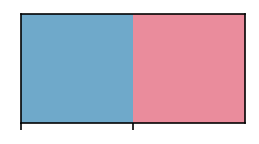

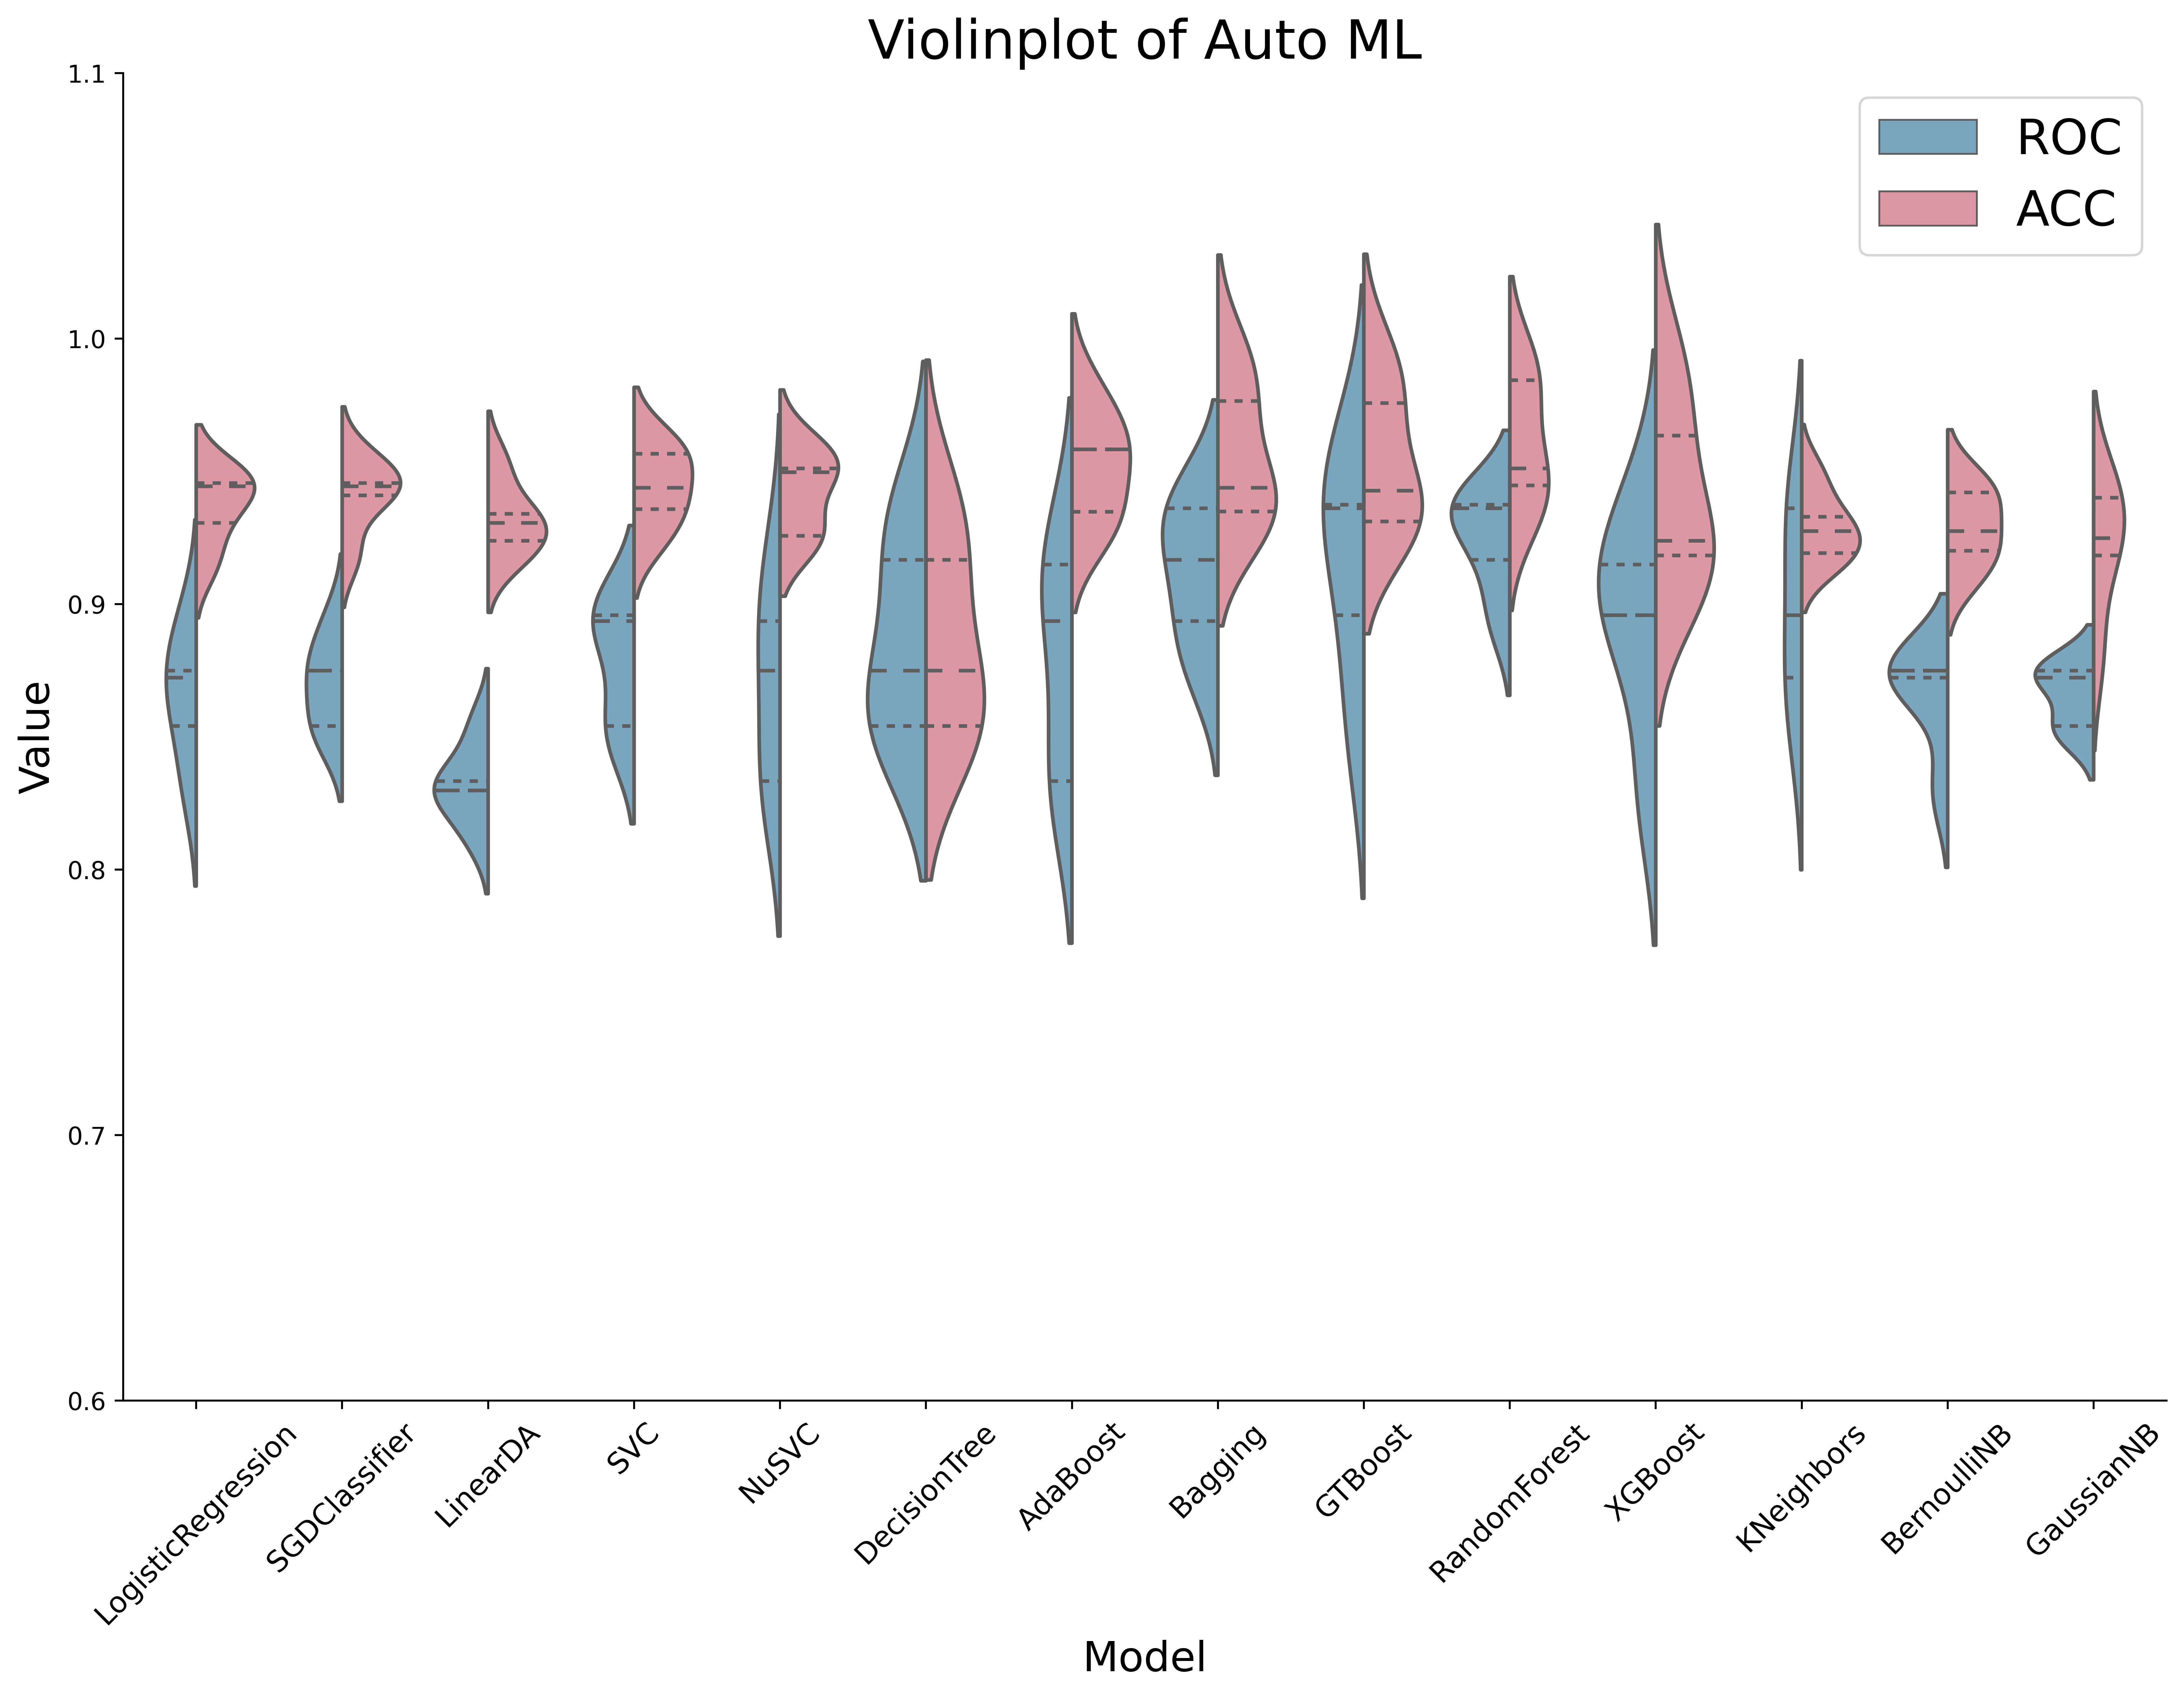

In [197]:
pal2 = sns.color_palette(['#6fa9ca','#ea8c9c'])
sns.set_palette(pal2)
sns.palplot(pal2) 
fig = plt.figure(figsize=(15,10),dpi=300) 
sns.violinplot(x="Model",
               y="Value",
               hue="variable",
               data=df_AB_fig_1,
               split=True,inner="quartile",
               )
# Decoration
plt.title('Violinplot of Auto ML', fontsize=22)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45,fontsize=12)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_xlabel(ax.get_xlabel(),fontsize=17)  # get函数得到原来默认的参数
ax.set_ylabel(ax.get_ylabel(),fontsize=17)
ax.set_ylim([0.6, 1.1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=20)             # loc="lower right",
# ax.ticks(fontsize=15)
plt.savefig("Paper_Fig\\Mdeol_Selection\\小提琴图.svg",bbox_inches="tight")
plt.show()

In [192]:
BBBBB= time()
print(BBBBB-AAAAA)

30.662996530532837


In [199]:
df_AB_fig_1.to_csv("Fig_data\\小提琴图数据.csv",index=False)

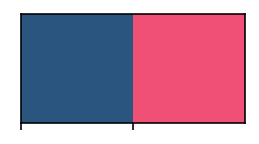

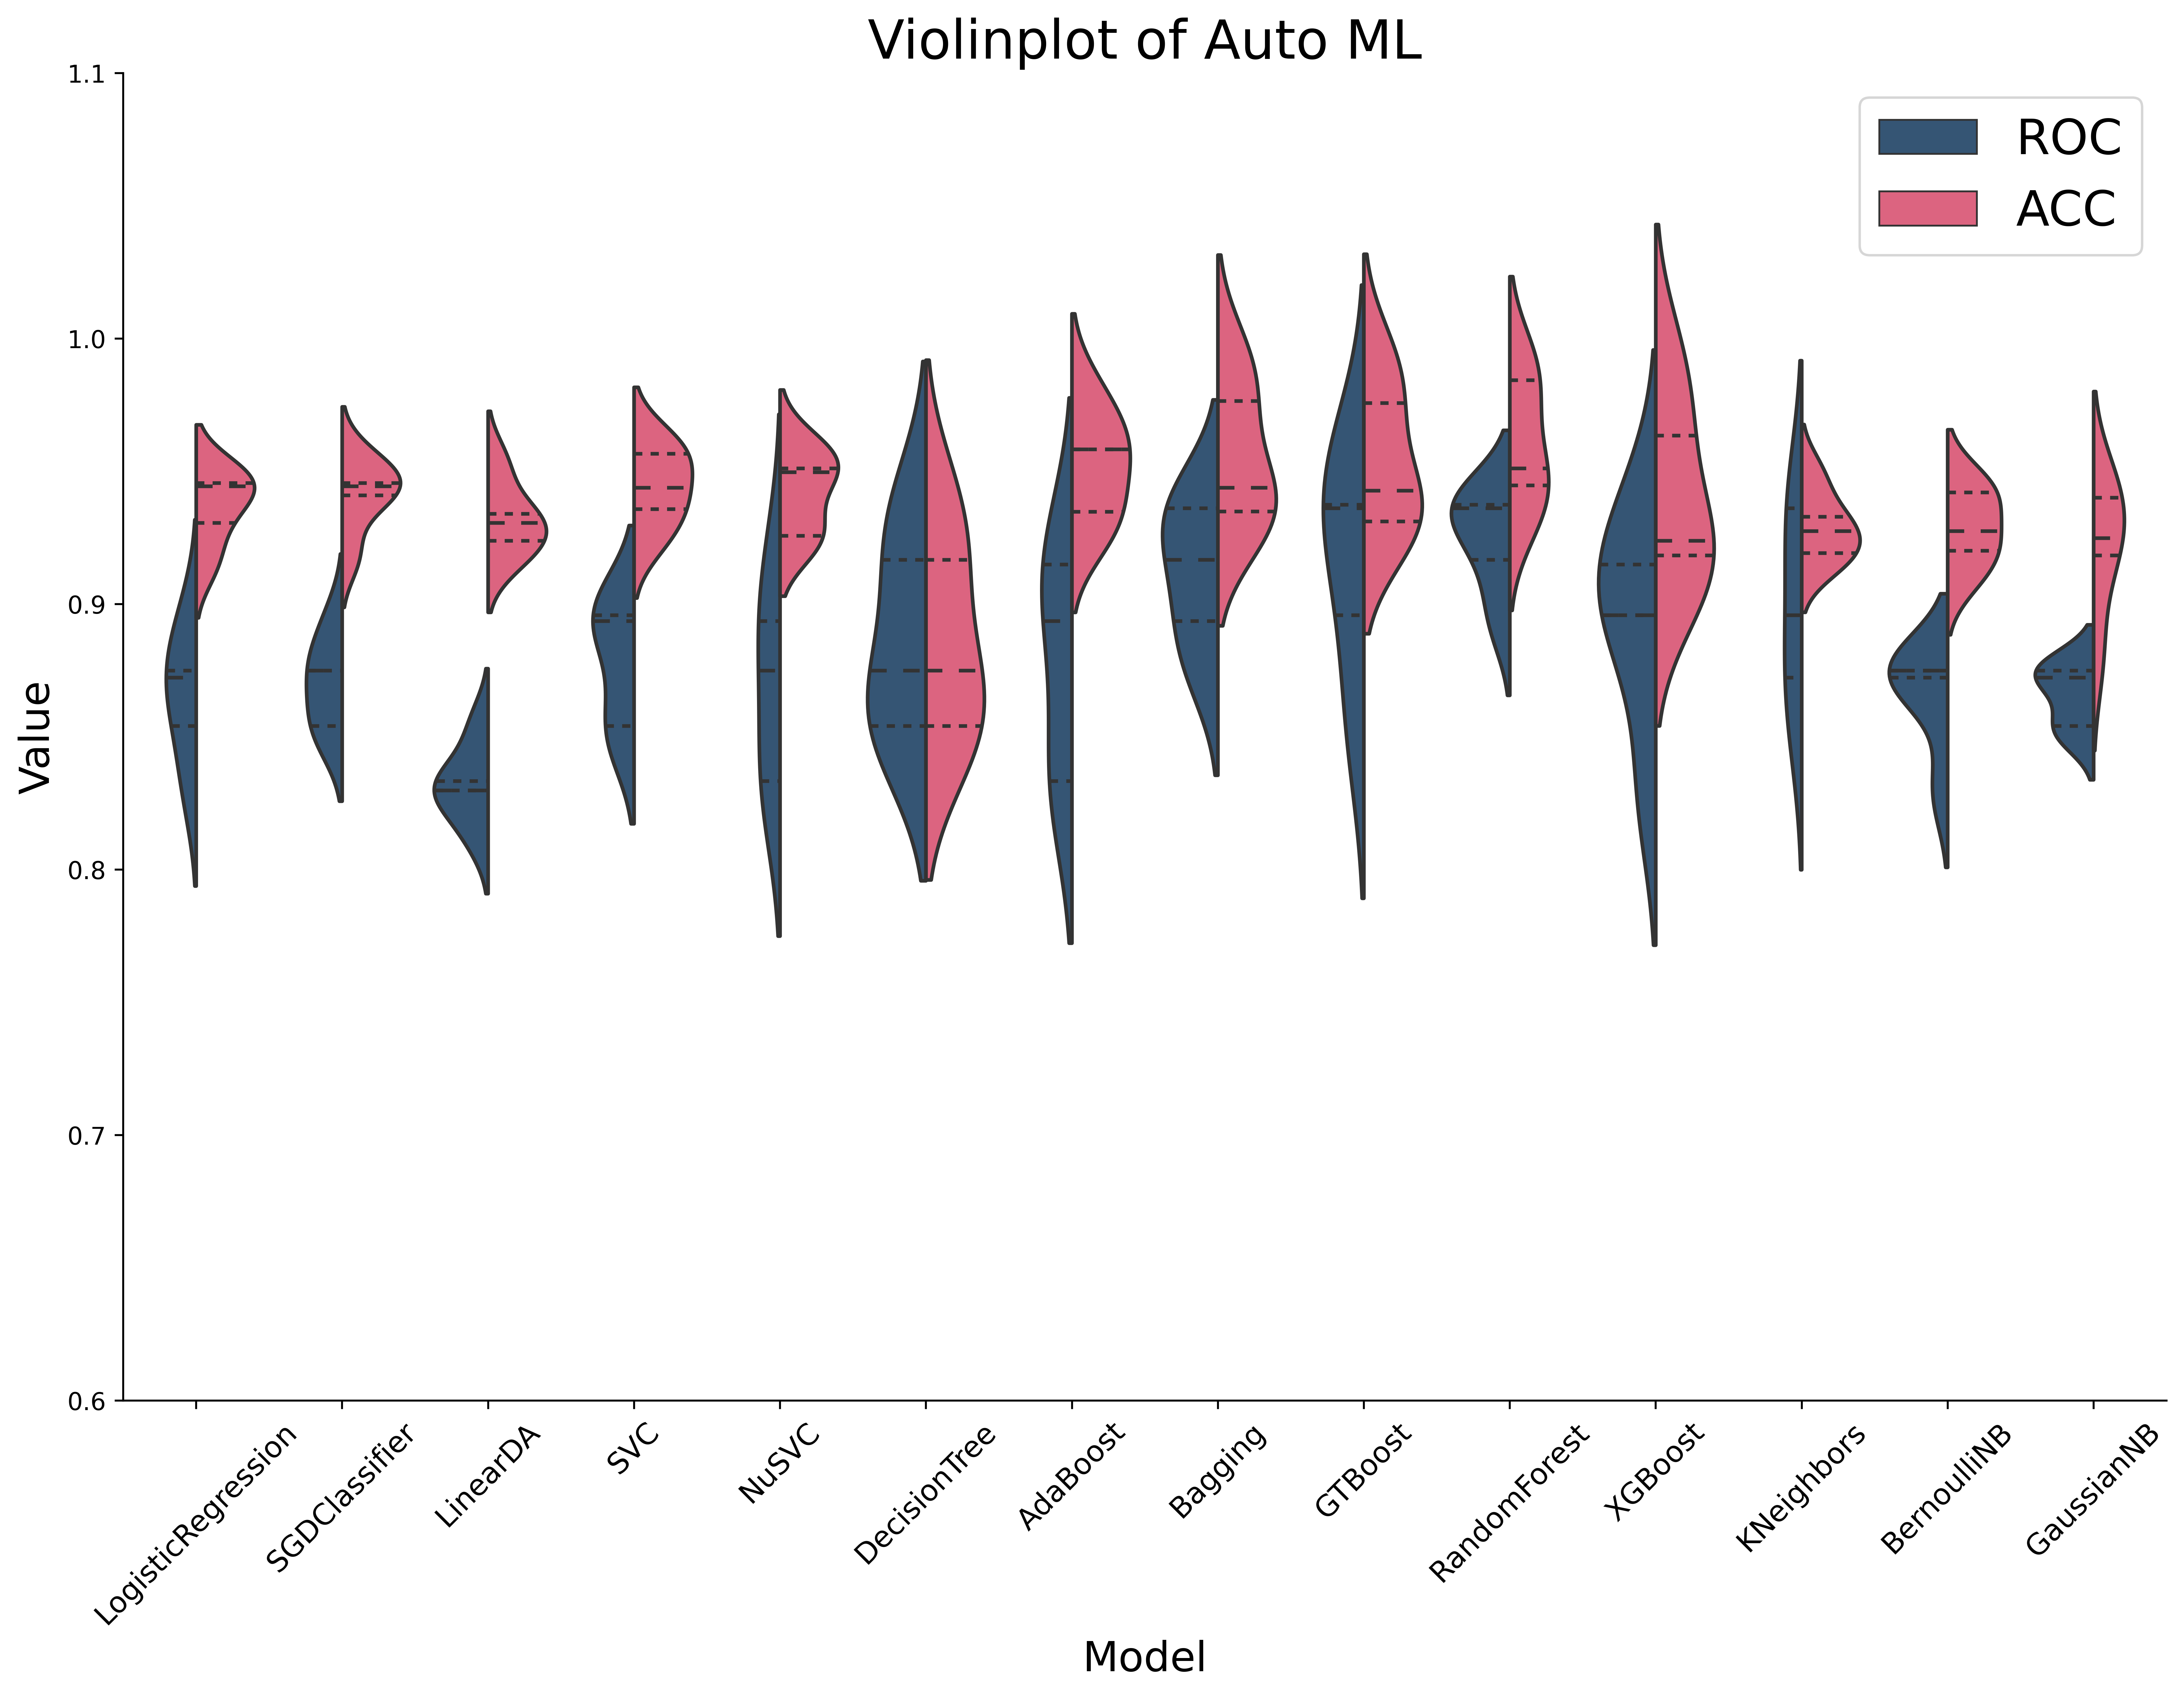

In [6]:
df_AB_fig_1=pd.read_csv("Fig_data/小提琴图数据.csv")
pal2 = sns.color_palette(['#2a557f', '#f05076'])
sns.set_palette(pal2)
sns.palplot(pal2) 
fig = plt.figure(figsize=(15,10),dpi=300) 
sns.violinplot(x="Model",
               y="Value",
               hue="variable",
               data=df_AB_fig_1,
               split=True,inner="quartile",
               )
# Decoration
plt.title('Violinplot of Auto ML', fontsize=22)
ax=plt.gca()
ax.set_xticklabels(ax.get_xticklabels(), rotation= 45,fontsize=12)
# ax.set_yticklabels(ax.get_yticklabels(), fontsize=12)
ax.set_xlabel(ax.get_xlabel(),fontsize=17)  # get函数得到原来默认的参数
ax.set_ylabel(ax.get_ylabel(),fontsize=17)
ax.set_ylim([0.6, 1.1])
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(fontsize=20)             # loc="lower right",
# ax.ticks(fontsize=15)
plt.savefig("Paper_Fig/Mdeol_Selection/小提琴图2.svg",bbox_inches="tight")
plt.show()